<a href="https://colab.research.google.com/github/gtmray/Regression-Test-King-County/blob/master/kc%20data%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.tree import DecisionTreeRegressor
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    sns.set()
except ImportError:
  print('IMPORT ERROR!!!!!!!!!!')
  print('Type pip install "model name" to install the packages')

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/gtmray/Regression-Test-King-County/master/kc_house_data.csv')
df_full = df.copy()
target = df['price']
df.drop(['id', 'date', 'price'], axis=1, inplace=True)
#pd.set_option('display.precision', 3)
pd.options.display.float_format = '{:.2f}'.format
plt.style.use('ggplot')

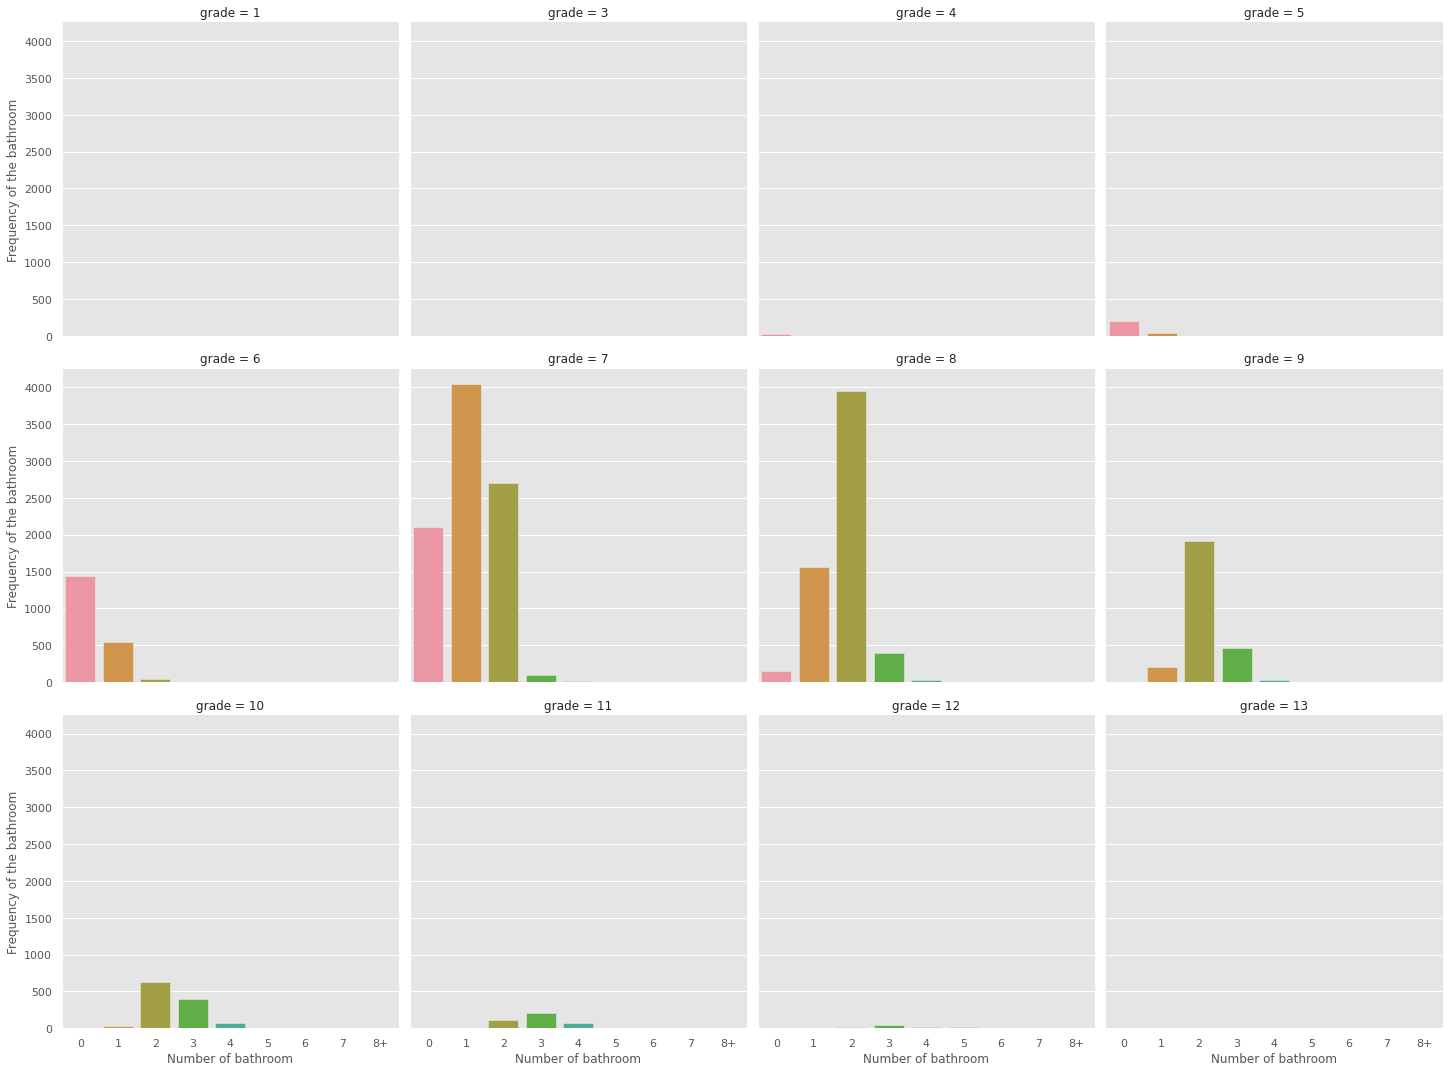

In [187]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, np.inf]
label = ['0', '1', '2', '3', '4', '5', '6', '7', '8+']
df['bathrooms range'] = pd.cut(df['bathrooms'], bins=bins, labels=label)
ax_bath = sns.catplot('bathrooms range', data=df, kind='count',col='grade', height=5, aspect=1, col_wrap=4)
ax_bath.set_axis_labels('Number of bathroom', 'Frequency of the bathroom')
plt.show()

Text(0.5, 1.0, 'HEAT MAP showing variables correlation')

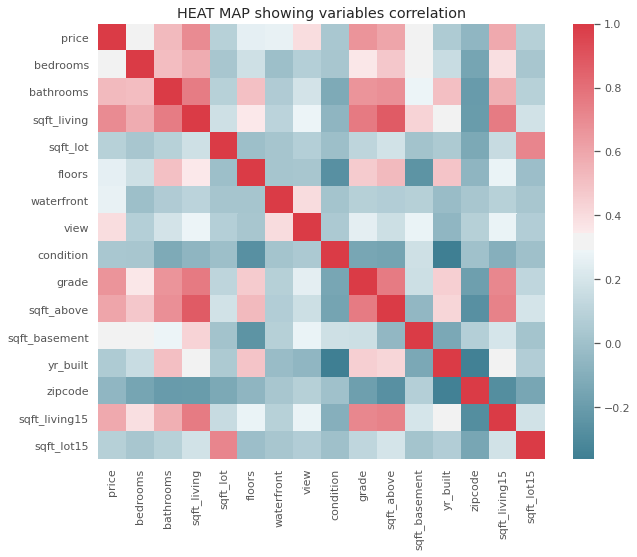

In [188]:
df_heat_map = df_full.copy()
for col in ['id', 'date', 'lat', 'long', 'yr_renovated']:
    del df_heat_map[col]
_,ax=plt.subplots(figsize=(10,8))
colormap=sns.diverging_palette(220,10,as_cmap=True)
ax_heat = sns.heatmap(df_heat_map.corr(), cmap=colormap)
ax_heat.set_title('HEAT MAP showing variables correlation')

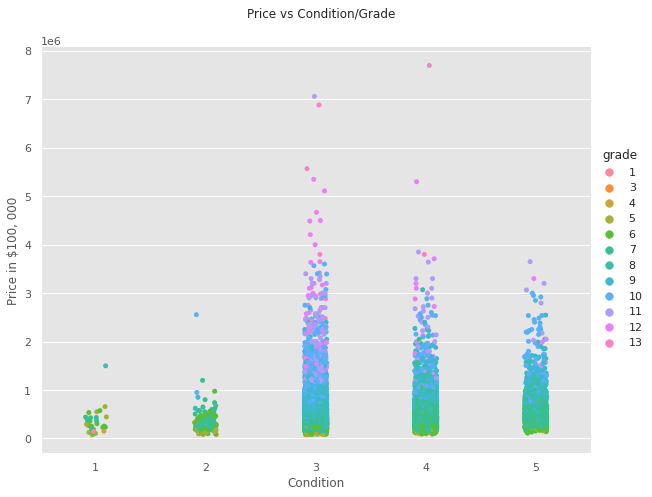

In [189]:
ax_condition = sns.catplot('condition', 'price', data=df_full, hue='grade', height=7, aspect=1.2)
ax_condition.set_axis_labels('Condition', 'Price in $100, 000')
plt.subplots_adjust(top=0.9)
ax_condition.fig.suptitle('Price vs Condition/Grade')
plt.show()

In [190]:
df_full.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [0]:
df_full['date'] = pd.to_datetime(df_full['date'])

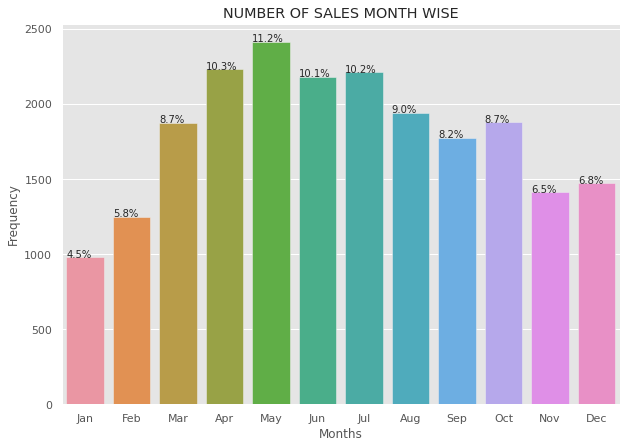

In [192]:
df_full['month'] = df_full.date.dt.strftime('%b')
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.countplot('month', data=df_full, order=['Jan', 'Feb', 'Mar', 'Apr', 'May',
                                                'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], orient='h')
total = len(df_full['month'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width() - 0.8
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))
ax.set_xlabel('Months')
ax.set_ylabel('Frequency')
ax.set_title('NUMBER OF SALES MONTH WISE')
plt.show()

In [193]:
!pip install joypy
import joypy as jp

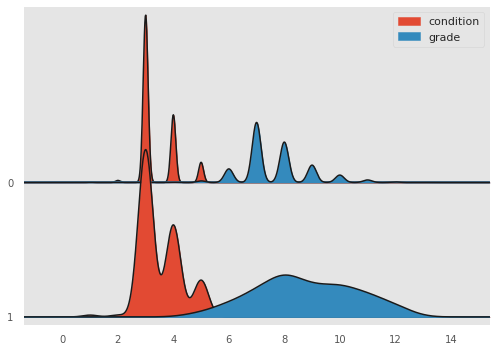

In [194]:
jp.joyplot(df_full, column= ['condition', 'grade'], by='waterfront', ylim='own', figsize=(7, 5), legend=True)
plt.show()

In [195]:
df_full.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,Oct
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,Dec
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,Feb
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,Dec
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,Feb


In [0]:
df_full = df_full.sort_values('date')
df_date = pd.DataFrame(df_full.date.value_counts().sort_index())
df_date = df_date.resample('W').mean()

In [198]:
import plotly.express as px
ax_pl = px.line(df_date, df_date.index, df_date.date)
ax_pl.update_xaxes(title_text='Date', tickangle=-45)
ax_pl.update_yaxes(title_text='Sales Frequency')
ax_pl.update_layout(title='Sales Weekly')
ax_pl.show()

MACHINE LEARNING PORTION !!!!!!!!!!!!!!

In [0]:
df_ml = df.drop('bathrooms range', axis=1)
target = np.log(target)
x_tr, x_tt, y_tr, y_tt = train_test_split(df_ml, target, test_size=0.2, random_state=42)

In [0]:
def regression_techniques(x_train, x_test, y_train, y_test):
    instance = [RandomForestRegressor(), LinearRegression(), GradientBoostingRegressor(), BaggingRegressor(),
                XGBRegressor(objective ='reg:squarederror'), DecisionTreeRegressor(), KNeighborsRegressor()]
    models = ['Random Forest', 'Linear Regression', 'Gradient Boost', 'Bagging', 'XG Boost', 'Decision Tree',
              'KNN']
    acc = []
    cvs = []
    mae = []
    mse = []
    smse = []
    dics_actual = {}
    dics_predict = {}
    for model in instance:
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
                                   
            model_name = models[instance.index(model)]
            actual_value = y_test.values
            pred_value = y_pred
            dics_actual[model_name] = list(actual_value)
            dics_predict[model_name] = list(pred_value)
            
            accuracy_score = model.score(x_test, y_test)
            cross_score = cross_val_score(model, x_test, y_test, cv=5)
            mae.append(mean_absolute_error(y_test, y_pred))
            mse.append(mean_squared_error(y_test, y_pred))
            smse.append(np.sqrt(mean_squared_error(y_test, y_pred)))

            acc.append(accuracy_score)
            cvs.append(cross_score.mean())
    
    df_score = pd.DataFrame({'Accuracy Score: ': acc, 'Cross Val Score: ': cvs, 'Mean absolute error': mae,
                             'Mean squared erroe': mse, 'Squared mean squared error': smse}, index = models)
    df_score = df_score.sort_values('Accuracy Score: ', ascending=False)
    df_actual_pred = pd.DataFrame(dics_predict)
    df_actual_pred['Actual Values'] = dics_actual['Random Forest']
    return df_score, df_actual_pred

In [205]:
returned_dff, returned_actual_predd = regression_techniques(x_tr, x_tt, y_tr, y_tt)
returned_df = returned_dff.copy()
returned_actual_pred = returned_actual_predd.copy()
print(returned_df)


                   Accuracy Score:   Cross Val Score:   Mean absolute error  \
Random Forest                  0.89               0.87                 0.13   
Bagging                        0.88               0.85                 0.13   
Gradient Boost                 0.88               0.87                 0.14   
XG Boost                       0.88               0.87                 0.14   
Decision Tree                  0.78               0.73                 0.18   
Linear Regression              0.77               0.77                 0.20   
KNN                            0.50               0.45                 0.29   

                   Mean squared erroe  Squared mean squared error  
Random Forest                    0.03                        0.18  
Bagging                          0.03                        0.18  
Gradient Boost                   0.03                        0.18  
XG Boost                         0.03                        0.18  
Decision Tree              

In [0]:
# pd.options.display.float_format = '{:.2f}'.format
# pd.set_option('display.max_columns', None)